In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns = ['mpg', 'cylinders', 'disp', 'hp', 'weight', 'accel', 'modelyr', 'origin', 'carname']
autompg = pd.read_csv('auto-mpg.csv', names = columns)
autompg.dropna(inplace = True)
autompg['hp'] = autompg['hp'].astype(np.float)

In [3]:
autompg

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,"chevrolet,chevelle malibu"
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82.0,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82.0,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82.0,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82.0,1,ford ranger


In [4]:
autompg.describe()

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


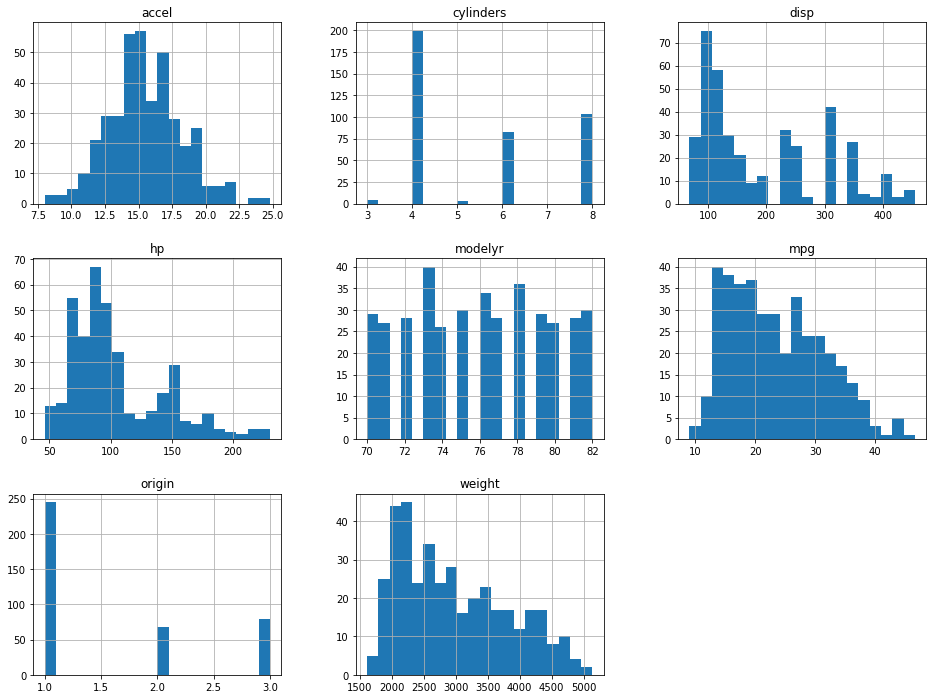

In [5]:
plt.rcParams['figure.figsize'] = 16, 12
autompg.hist(bins = 20)
plt.show()

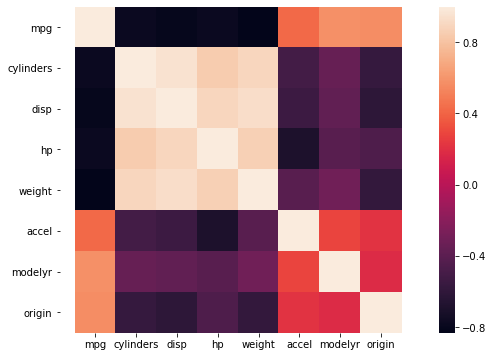

In [6]:
plt.rcParams['figure.figsize'] = 8, 6
sns.heatmap(autompg.corr(), square = True);
plt.axis('equal');

# shows all features are at least mildly correlated
# least correlated features are accel, modelyr, origin


In [7]:
autompg.corr()['mpg']

mpg          1.000000
cylinders   -0.777618
disp        -0.805127
hp          -0.778427
weight      -0.832244
accel        0.423329
modelyr      0.580541
origin       0.565209
Name: mpg, dtype: float64

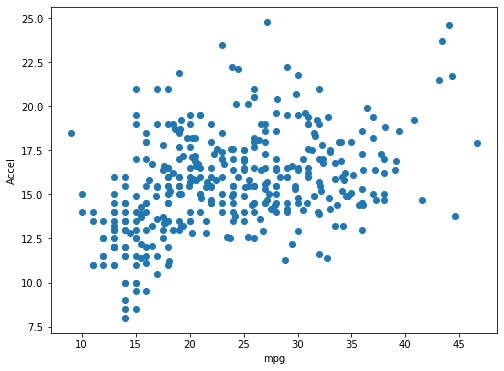

In [8]:
plt.scatter(autompg['mpg'], autompg['accel'])
plt.ylabel('Accel')
plt.xlabel('mpg')
plt.show()

# randomly arranged - seemingly no relationship

In [9]:
# metric = RMSE
def rmse(true, pred):
    rmse = np.mean(np.square(true - pred))
    return rmse

In [10]:
# Separate train test sets
from sklearn.model_selection import StratifiedShuffleSplit

test_size = 0.2
num_datapoints = len(autompg)
                     
weight_cat = pd.cut(autompg["weight"], bins=[0, 1500, 2000, 3500, np. inf], labels = [1, 2, 3, 4])
split = StratifiedShuffleSplit(n_splits = 1, test_size = test_size, random_state = 42) 
for train_index, test_index in split.split(autompg, weight_cat): 
    strat_train_set = autompg.iloc[train_index] 
    strat_test_set = autompg.iloc[test_index]

autompg_train = strat_train_set.copy()

In [11]:
avg_mpg = np.mean(autompg_train['mpg'])
baseline_preds = avg_mpg * np.ones(int(np.ceil(num_datapoints * test_size)))
y_test = strat_test_set['mpg']

print(rmse(baseline_preds, y_test))

70.81405523136934


In [12]:
autompg_train

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin,carname
298,23.0,8,350.0,125.0,3900.0,17.4,79.0,1,cadillac eldorado
226,20.5,6,231.0,105.0,3425.0,16.9,77.0,1,buick skylark
122,24.0,4,121.0,110.0,2660.0,14.0,73.0,2,saab 99le
364,26.6,8,350.0,105.0,3725.0,19.0,81.0,1,oldsmobile cutlass ls
308,33.5,4,151.0,90.0,2556.0,13.2,79.0,1,pontiac phoenix
...,...,...,...,...,...,...,...,...,...
277,16.2,6,163.0,133.0,3410.0,15.8,78.0,2,peugeot 604sl
128,15.0,6,250.0,100.0,3336.0,17.0,74.0,1,chevrolet nova
259,20.8,6,200.0,85.0,3070.0,16.7,78.0,1,mercury zephyr
225,17.5,6,250.0,110.0,3520.0,16.4,77.0,1,chevrolet concours


In [13]:
autompg_train.corr()['mpg']

mpg          1.000000
cylinders   -0.778516
disp        -0.807674
hp          -0.781327
weight      -0.836770
accel        0.433985
modelyr      0.561238
origin       0.553627
Name: mpg, dtype: float64

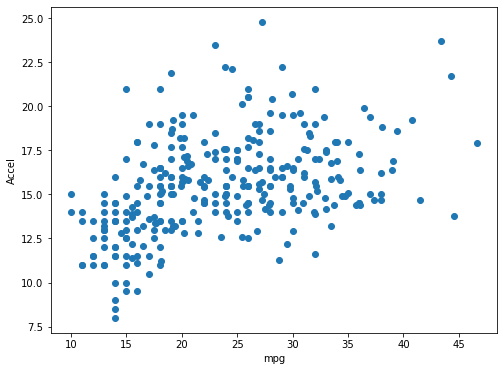

In [14]:
plt.scatter(autompg_train['mpg'], autompg_train['accel'])
plt.ylabel('Accel')
plt.xlabel('mpg')
plt.show()

# accel still looks random

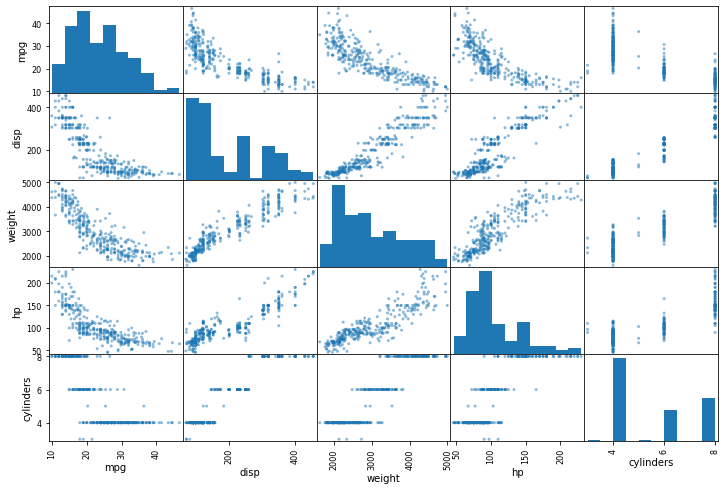

In [15]:
from pandas.plotting import scatter_matrix
corr_features = ['mpg', 'disp', 'weight', 'hp', 'cylinders']
scatter_matrix(autompg_train[corr_features], figsize = (12, 8));

# disp, weight, hp are tail heavy

In [16]:
autompg_train.head()

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin,carname
298,23.0,8,350.0,125.0,3900.0,17.4,79.0,1,cadillac eldorado
226,20.5,6,231.0,105.0,3425.0,16.9,77.0,1,buick skylark
122,24.0,4,121.0,110.0,2660.0,14.0,73.0,2,saab 99le
364,26.6,8,350.0,105.0,3725.0,19.0,81.0,1,oldsmobile cutlass ls
308,33.5,4,151.0,90.0,2556.0,13.2,79.0,1,pontiac phoenix


In [17]:
y = autompg_train['mpg']
autompg_train.drop('mpg', axis = 1, inplace = True)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class ArrayTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        return X.toarray()
    
class ToSeries(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X.squeeze()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(categories = 'auto'))
])

text_pipeline = Pipeline([
    ('toseries', ToSeries()),
    ('tfv', TfidfVectorizer(max_features = 20)),
    ('toarray', ArrayTransformer())
])


In [20]:
from sklearn.compose import ColumnTransformer

cat_attribs = ['origin']
text_attribs = ['carname']
num_attribs = ['cylinders', 'disp', 'hp', 'weight', 'accel', 'modelyr']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
    ('text', text_pipeline, text_attribs)
])

autompg_full_tr = full_pipeline.fit_transform(autompg_train)

In [88]:
cat_np = cat_pipeline.fit_transform(autompg_train[cat_attribs]).toarray()
columns = ['American', 'European', 'Japanese']
cat_df = pd.DataFrame(cat_np, columns = columns)

num_np = num_pipeline.fit_transform(autompg_train[num_attribs])
num_df = pd.DataFrame(num_np, columns = num_attribs)

text_np = text_pipeline.fit_transform(autompg_train[text_attribs])

columns = []
idx_colname_dict = {
    value : key for key, value in text_pipeline['tfv'].vocabulary_.items()}

for i in range(20):
    columns.append(idx_colname_dict[i])

text_df = pd.DataFrame(text_np, columns = columns) 

autompg_full_df = pd.concat([num_df, cat_df, text_df], axis = 1, sort = False)
columns = autompg_full_df.columns

In [75]:
autompg_full_df

,cylinders,disp,hp,weight,accel,modelyr,American,European,Japanese,amc,...,honda,mazda,mercury,oldsmobile,peugeot,plymouth,pontiac,sw,toyota,volkswagen
0,1.0,0.728682,0.429348,0.675827,0.559524,0.750000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.421189,0.320652,0.535461,0.529762,0.583333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.136951,0.347826,0.309397,0.357143,0.250000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.728682,0.320652,0.624113,0.654762,0.916667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.214470,0.239130,0.278664,0.309524,0.750000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.6,0.245478,0.472826,0.531028,0.464286,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
309,0.6,0.470284,0.293478,0.509161,0.535714,0.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.6,0.341085,0.211957,0.430556,0.517857,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.6,0.470284,0.347826,0.563534,0.500000,0.583333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Shortlisting models

In [195]:
from sklearn. model_selection import cross_val_score

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [146]:
# Random Forests
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 7)
scores = cross_val_score(rf_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
rf_mean_rmse = np.mean(np.sqrt(-scores))

print(rf_mean_rmse) #shortlisted

2.532383840433222


In [147]:
# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(n_estimators = 10, random_state = 7)
scores = cross_val_score(et_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
et_mean_rmse = np.mean(np.sqrt(-scores))

print(et_mean_rmse) #shortlisted

2.56550112312961


In [200]:
# xgboost
xgb_reg = XGBRegressor(n_estimators = 10, random_state = 7)
scores = cross_val_score(xgb_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
xgb_mean_rmse = np.mean(np.sqrt(-scores))

print(xgb_mean_rmse) #shortlisted

2.69600398969198


In [149]:
# SVR
svr_reg = SVR(gamma = 'scale')
scores = cross_val_score(svr_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
svr_mean_rmse = np.mean(np.sqrt(-scores))

print(svr_mean_rmse)

3.827141947457458


In [150]:
# Ridge
ridge_reg = Ridge(alpha = 0.001)
scores = cross_val_score(ridge_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
ridge_mean_rmse = np.mean(np.sqrt(-scores))

print(ridge_mean_rmse)

3.2272845562092316


In [151]:
# Lasso
lasso_reg = Lasso(alpha = 0.05)
scores = cross_val_score(lasso_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
lasso_mean_rmse = np.mean(np.sqrt(-scores))

print(lasso_mean_rmse)

3.244445958763886


In [152]:
# KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 7)
scores = cross_val_score(knn_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
knn_mean_rmse = np.mean(np.sqrt(-scores))

print(knn_mean_rmse)

4.0481375269734965


In [153]:
rf_reg.fit(autompg_full_df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=7, verbose=0,
                      warm_start=False)

In [154]:
rf_reg.feature_importances_

array([1.32333779e-01, 2.60901925e-01, 9.62767619e-02, 3.55421796e-01,
       2.45910260e-02, 1.10321277e-01, 1.41827574e-03, 2.21370756e-03,
       3.99334515e-03, 1.03492867e-04, 1.06628992e-04, 2.49032529e-04,
       1.37283539e-03, 2.11988482e-04, 4.72824662e-04, 1.58966393e-03,
       6.67311124e-04, 5.57265922e-04, 8.17273645e-04, 6.07453690e-04,
       1.37191325e-03, 5.96087134e-04, 7.13842892e-04, 1.17361788e-04,
       2.92316973e-04, 6.32556752e-04, 3.29056022e-04, 4.27756680e-04,
       1.29144329e-03])

In [155]:
ranked_features = [columns[idx] for idx in np.argsort(rf_reg.feature_importances_)]
ranked_features.reverse()
print(ranked_features)

['weight', 'disp', 'cylinders', 'modelyr', 'hp', 'accel', 'Japanese', 'European', 'datsun', 'American', 'chevrolet', 'mazda', 'volkswagen', 'ford', 'oldsmobile', 'dodge', 'pontiac', 'honda', 'mercury', 'fiat', 'custom', 'toyota', 'sw', 'plymouth', 'buick', 'corolla', 'peugeot', 'brougham', 'amc']


### Grid search on shortlisted algorithms

In [198]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_pipeline = Pipeline([('rf', DummyRegressor())]) # placeholder estimator
param_grid = {
        'rf': [RandomForestRegressor(random_state = 7)],
        'rf__n_estimators': [10, 100, 1000],
        'rf__max_depth': [10, 100],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
}

search = RandomizedSearchCV(rf_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                            random_state = 7, n_iter = 20, scoring = 'neg_mean_squared_error')
# search = GridSearchCV(rf_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = 'neg_mean_squared_error')

best_rf_reg = search.fit(autompg_full_df, y).best_estimator_[0]
print(best_rf_reg)
print(- search.best_score_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=7, verbose=0,
                      warm_start=False)
6.0287524506389545


In [203]:
et_pipeline = Pipeline([('et', DummyRegressor())]) # placeholder estimator
param_grid = {
        'et': [ExtraTreesRegressor(random_state = 7)],
        'et__n_estimators': [10, 100, 1000],
        'et__max_depth': [10, 100],
        'et__min_samples_split': [2, 5, 10],
        'et__min_samples_leaf': [1, 2, 4],
}

search = RandomizedSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                            random_state = 7, n_iter = 20, scoring = 'neg_mean_squared_error')
# search = GridSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = 'neg_mean_squared_error')

best_et_reg = search.fit(autompg_full_df, y).best_estimator_[0]
print(best_et_reg)
print(- search.best_score_)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=100,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=5,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=7, verbose=0,
                    warm_start=False)
5.943353362557615


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [209]:
xgb_pipeline = Pipeline([('xgb', DummyRegressor())]) # placeholder estimator
param_grid = {
        'xgb': [XGBRegressor(random_state = 7)],
        'xgb__eta': [0.01, 0.015, 0.025, 0.05, 0.1],
        'xgb__gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 1],
        'xgb__max_depth': [2, 5, 10, 20],
}

search = RandomizedSearchCV(xgb_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                            random_state = 7, n_iter = 20, scoring = 'neg_mean_squared_error')
# search = GridSearchCV(xgb_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = 'neg_mean_squared_error')

best_xgb_reg = search.fit(autompg_full_df, y).best_estimator_[0]
print(best_xgb_reg)
print(- search.best_score_)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.7,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
5.94321489533708


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
